In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import pandas as pd

import sys
sys.path.insert(0,'../')

from nnAudio import Spectrogram
import torchaudio

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
# t_start = time.time()
# mel_layer = Spectrogram.STFT()
# time_used = time.time()-t_start
# print(time_used)

In [4]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
y_torch.shape

torch.Size([1770, 80000])

In [6]:
specgram = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512)(y_torch)

In [7]:
timing = []

for e in range(20):
    t_start = time.time()
#     spec = mel_layer(y_torch)
    specgram = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512)(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.00636601448059082
0.0009334087371826172
0.0007171630859375
0.0007331371307373047
0.0006482601165771484
0.0006508827209472656
0.0006477832794189453
0.0006437301635742188
0.0006420612335205078
0.0006458759307861328
0.0006387233734130859
0.0006427764892578125
0.0006382465362548828
0.0006365776062011719
0.0006546974182128906
0.0006399154663085938
0.0006661415100097656
0.0006384849548339844
0.0006339550018310547
0.0006330013275146484


In [8]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.0009525418281555176
std =  0.0012436965581606287


In [9]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torchaudio_GPU'

In [13]:
data.to_csv('Spec_torchaudio_GPU')

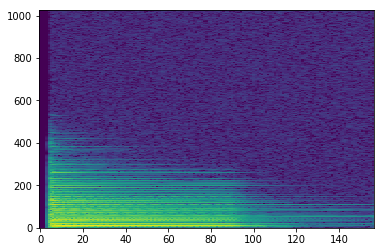

In [12]:
plt.imshow(torch.log(specgram[0]+1).cpu().numpy(), aspect='auto', origin='lower')